In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [2]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy

def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended


def is_mjj(month):
    return (month>=5) & (month<=7)


dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'

dir_forcing = '/home/clima-archive2/rfarneti/INPUT_DATA/JRA55-do-1-5-0/'
dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'
#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'
path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

period_str = 1985
period_end = 2004

%matplotlib inline

/tmp/ipykernel_13280/3731587110.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load MOM JRA55

In [3]:
ssta_mom_atl = xr.open_dataset(path_data_out+'tos_mom_atl_1985_2004.nc')

In [4]:
ssta_eq_mom_mjj_atl = ssta_mom_atl.tosa_atl.sel(time=is_mjj(
    ssta_mom_atl.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_eq_mom_mjj_atl = np.sqrt(ssta_eq_mom_mjj_atl.var(dim='year'))

In [5]:
thetao_eq_mom = xr.open_dataset(path_data_out+'temp_mom_JRA55_eq_1985_2004.nc')
dtdz_eq_mom = xr.open_dataset(path_data_out+'dtdz_mom_eq_1985_2004_newtest.nc')
mld_eq_mom = xr.open_dataset(path_data_out+'mld_mom_JRA55_eq_1985_2004.nc')



mld_eq_mom_jja = mld_eq_mom.mld.sel(time=is_mjj(mld_eq_mom.mld['time.month'])).mean(dim='time')
dtdz_eq_mom_jja = dtdz_eq_mom.dtdz_max.sel(time=is_mjj(dtdz_eq_mom.dtdz_max['time.month'])).mean(dim='time')
thetao_eq_mom_jja = thetao_eq_mom.tempa.sel(time=is_mjj(thetao_eq_mom.tempa['time.month']))
std_thetao_eq_mom_jja = thetao_eq_mom_jja.groupby('time.year').mean().std(dim='year')


# Load MOM JRA55 with CORE-II winds

In [6]:
ssta_momcore2_atl = xr.open_dataset(path_data_out+'tos_mom_core2_atl_1985_2004.nc')

In [7]:
ssta_eq_momcore2_mjj_atl = ssta_momcore2_atl.tosa_atl.sel(time=is_mjj(
    ssta_momcore2_atl.tosa_atl['time.month'])).groupby('time.year').mean()
std_ssta_eq_momcore2_mjj_atl = np.sqrt(ssta_eq_momcore2_mjj_atl.var(dim='year'))

In [8]:


thetao_eq_mom_core2 = xr.open_dataset(path_data_out+'temp_mom_JRA55_core2_eq_1985_2004.nc')
dtdz_eq_mom_core2 = xr.open_dataset(path_data_out+'dtdz_mom_core2_eq_1985_2004_newtest.nc')
mld_eq_mom_core2 = xr.open_dataset(path_data_out+'mld_mom_JRA55_core2_eq_1985_2004.nc')


mld_eq_mom_core2_jja = mld_eq_mom_core2.mld.sel(time=is_mjj(mld_eq_mom_core2.mld['time.month'])).mean(dim='time')
dtdz_eq_mom_core2_jja = dtdz_eq_mom_core2.dtdz_max.sel(time=is_mjj(dtdz_eq_mom_core2.dtdz_max['time.month'])).mean(dim='time')
thetao_eq_mom_core2_jja = thetao_eq_mom_core2.tempa.sel(time=is_mjj(thetao_eq_mom_core2.tempa['time.month']))
std_thetao_eq_mom_core2_jja = thetao_eq_mom_core2_jja.groupby('time.year').mean().std(dim='year')

In [9]:

dtdz_eq_mom_jja_atl3 = dtdz_eq_mom_jja.where((dtdz_eq_mom_jja.lon>=-20)&(dtdz_eq_mom_jja.lon<=0))
dtdz_eq_mom_core2_jja_atl3 = dtdz_eq_mom_core2_jja.where((dtdz_eq_mom_core2_jja.lon>=-20)&(dtdz_eq_mom_core2_jja.lon<=0))

# Figure 9

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


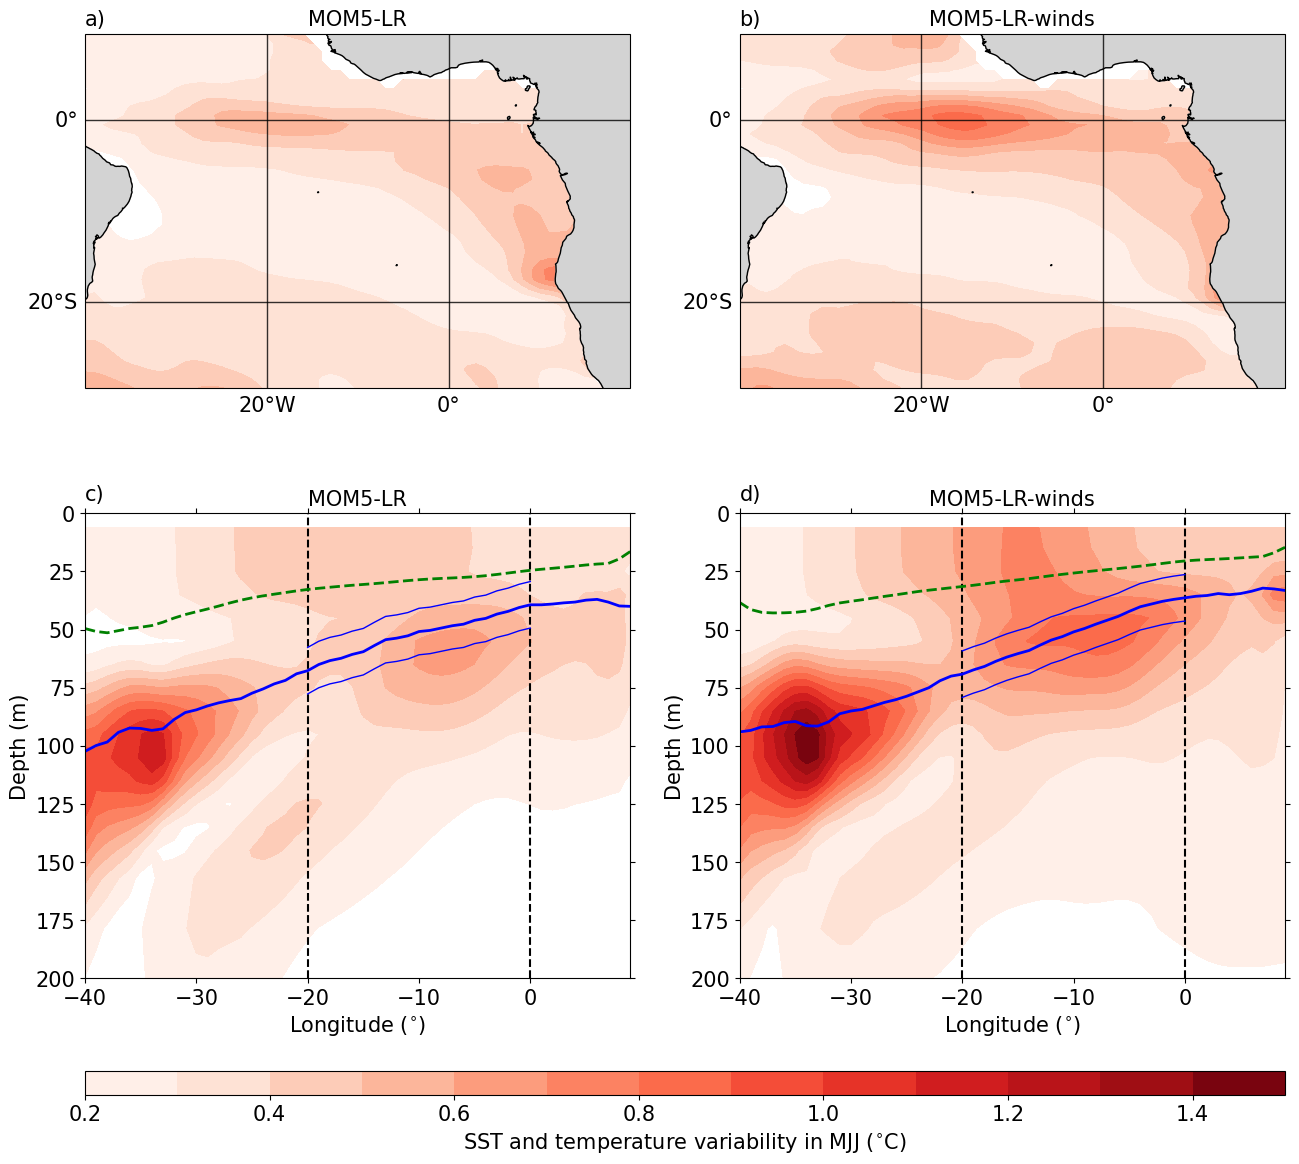

In [10]:
fig = plt.figure(figsize=[12,10])
fig.patch.set_facecolor('white')
ftz=15
gs=gridspec.GridSpec(2,2)
levels=np.arange(0.2,1.6,0.1)
cmap=plt.cm.Reds
ax0 = fig.add_subplot(gs[0,0],projection=ccrs.PlateCarree())
ax1 = fig.add_subplot(gs[0,1],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.15, wspace=0.2)


cax0 = inset_axes(ax2,
                 width='220%',
                 height='5%',
                 loc='lower left',
                 bbox_to_anchor=(0,-0.25,1,1),
                 bbox_transform = ax2.transAxes,
                 borderpad=0)


p0 = ax0.contourf(std_ssta_eq_mom_mjj_atl.lon,std_ssta_eq_mom_mjj_atl.lat,std_ssta_eq_mom_mjj_atl,cmap= cmap,
            levels =levels,transform=ccrs.PlateCarree())

gl = ax0.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='black',alpha=0.8,linestyle='-')
gl.xlabels_top = False
gl.ylabels_right=False
gl.xlabel_style = {'size':ftz, 'color':'black'}
gl.ylabel_style = {'size':ftz, 'color':'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0])
gl.ylocator = mticker.FixedLocator([-20,0])
ax0.coastlines(linewidth=1,zorder=4)
ax0.add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=2)
cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('SST and temperature variability in MJJ ($^{\circ}$C)',fontsize=ftz)
ax0.set_title('MOM5-LR',fontsize=ftz)
ax0.text(0,1.04,string.ascii_lowercase[0]+')',transform=ax0.transAxes,size=ftz,        
           verticalalignment='center') 




p0 = ax1.contourf(std_ssta_eq_momcore2_mjj_atl.lon,
                  std_ssta_eq_momcore2_mjj_atl.lat,
                  std_ssta_eq_momcore2_mjj_atl,cmap= cmap,
            levels =levels,transform=ccrs.PlateCarree())

gl = ax1.gridlines(crs = ccrs.PlateCarree(),draw_labels=True,linewidth=1,color='black',alpha=0.8,linestyle='-')
gl.xlabels_top = False
gl.ylabels_right=False
gl.xlabel_style = {'size':ftz, 'color':'black'}
gl.ylabel_style = {'size':ftz, 'color':'black'}
gl.xlocator = mticker.FixedLocator([-40,-20,0])
gl.ylocator = mticker.FixedLocator([-20,0])
ax1.coastlines(linewidth=1,zorder=4)
ax1.add_feature(cartopy.feature.LAND,edgecolor='black',color='lightgrey',zorder=2)
ax1.set_title('MOM5-LR-winds',fontsize=ftz)

ax1.text(0,1.04,string.ascii_lowercase[1]+')',transform=ax1.transAxes,size=ftz,        
           verticalalignment='center') 




p0 = ax2.contourf(std_thetao_eq_mom_jja.lon,
               std_thetao_eq_mom_jja.depth,
               std_thetao_eq_mom_jja[:,:],
               cmap=cmap,
               levels=levels,
               extend='max')
ax2.axvline(0,color='black',linestyle='--')
ax2.axvline(-20,color='black',linestyle='--')
ax2.plot(dtdz_eq_mom_jja_atl3.lon,dtdz_eq_mom_jja_atl3+10,color='blue',linewidth=1)    
ax2.plot(dtdz_eq_mom_jja_atl3.lon,dtdz_eq_mom_jja_atl3-10,color='blue',linewidth=1)
ax2.plot(dtdz_eq_mom_jja.lon,dtdz_eq_mom_jja,color='blue',linewidth=2)
ax2.plot(mld_eq_mom_jja.lon,mld_eq_mom_jja,color='green',linewidth=2,linestyle='--')
ax2.set_ylim([0,200])
ax2.set_xlim([-40,9])
ax2.set_title('MOM5-LR',fontsize=ftz)
ax2.set_ylabel('Depth (m)',fontsize=ftz)
ax2.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax2.invert_yaxis()
ax2.text(0,1.04,string.ascii_lowercase[2]+')',transform=ax2.transAxes,size=ftz,        
           verticalalignment='center')  
ax2.tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)








p0 = ax3.contourf(std_thetao_eq_mom_core2_jja.lon,
               std_thetao_eq_mom_core2_jja.depth,
               std_thetao_eq_mom_core2_jja[:,:],
               cmap=cmap,
               levels=levels,
               extend='max')
ax3.axvline(0,color='black',linestyle='--')
ax3.axvline(-20,color='black',linestyle='--')
ax3.plot(dtdz_eq_mom_core2_jja_atl3.lon,dtdz_eq_mom_core2_jja_atl3+10,color='blue',linewidth=1)    
ax3.plot(dtdz_eq_mom_core2_jja_atl3.lon,dtdz_eq_mom_core2_jja_atl3-10,color='blue',linewidth=1)
ax3.plot(dtdz_eq_mom_core2_jja.lon,dtdz_eq_mom_core2_jja,color='blue',linewidth=2)
ax3.plot(mld_eq_mom_core2_jja.lon,mld_eq_mom_core2_jja,color='green',linewidth=2,linestyle='--')
ax3.set_ylim([0,200])
ax3.set_xlim([-40,9])
ax3.set_title('MOM5-LR-winds',fontsize=ftz)
ax3.set_ylabel('Depth (m)',fontsize=ftz)
ax3.invert_yaxis()
ax3.text(0,1.04,string.ascii_lowercase[3]+')',transform=ax3.transAxes,size=ftz,
           
           verticalalignment='center')  
ax3.tick_params(labelsize=ftz,left=True,right=True,top=True,bottom=True,
                      labelleft=True,labelright=False,labeltop=False,labelbottom=True)
ax3.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


plt.savefig(path_fig+'figure_09.png',bbox_inches='tight',dpi=300)